<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
<h1 class="list-group-item list-group-item-action active" data-toggle="list" style='background:#005097; border:0' role="tab" aria-controls="home"><center>APRENDIZADO DE MÁQUINA (CIC1205/GCC1932) - Trabalho 2</center></h1>

- Nome completo: Vinicius Gonçalves Paraizo Borges
- [Link para vídeo](<https://youtu.be/WokJL2Rh_lw>)

# (1) Engenharia de Features

O conjunto de dados diamonds contém informações sobre mais de 50.000 diamantes, incluindo
características como quilate, corte, cor, pureza e preço. Este item visa avaliar a sua capacidade
de realizar transformações úteis nas variáveis disponíveis e criar novas features que
potencialmente aumentem o poder preditivo de modelos de regressão.

Realize a engenharia de features no conjunto de dados diamonds, considerando as instruções
abaixo:

1. Criação de Novas Features: Crie pelo menos duas novas variáveis derivadas das
existentes. Algumas possibilidades incluem:

    - Combinação de variáveis (ex.: volume do diamante a partir de x, y, z);
    - Codificação ordinal (ex.: transformar cut, color, clarity em variáveis numéricas
com base em seu nível de qualidade percebido);
    - Transformações logarítmicas ou polinomiais de variáveis contínuas (ex.: log(carat),
carat2);
    - Criação de variáveis binárias ou categóricas a partir de limiares relevantes.

2. Justificativa: Para cada nova feature criada, explique o raciocínio por trás da transformação
ou combinação. Justifique por que ela pode ser útil para um modelo de regressão
que prediz o preço do diamante.

3. Visualização Exploratória: Inclua pelo menos dois gráficos (ex.: boxplots, scatterplots
com regressão, heatmaps) que ajudem a ilustrar como suas novas features se
relacionam com o preço do diamante.

4. Entrega: Apresente o código utilizado, os gráficos gerados e as justificativas das novas
features no vídeo explicativo do trabalho.

In [85]:
import pandas as pd
path = 'https://raw.githubusercontent.com/AILAB-CEFET-RJ/cic1205/refs/heads/main/data/diamonds.csv'
diamonds = pd.read_csv(path)

In [86]:
# Explanatory Data Analysis

diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


*OBS:*

Importante ressaltar os percentis de 'carat', 'price' e 'x', 'y', 'z'. Valores baixos até o percentil 75, em comparação com os seus respectivos máximos.


<Axes: xlabel='carat', ylabel='Count'>

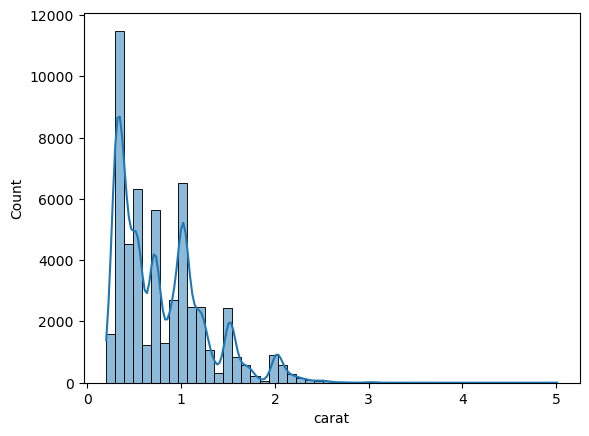

In [87]:
import seaborn as sns

# Carat

sns.histplot(diamonds['carat'], bins=50, kde=True)

# Percebe-se que a distribuição de carat está assimétrica
# indicando que a maior parte dos diamantes tem um carat baixo

<Axes: xlabel='price', ylabel='Count'>

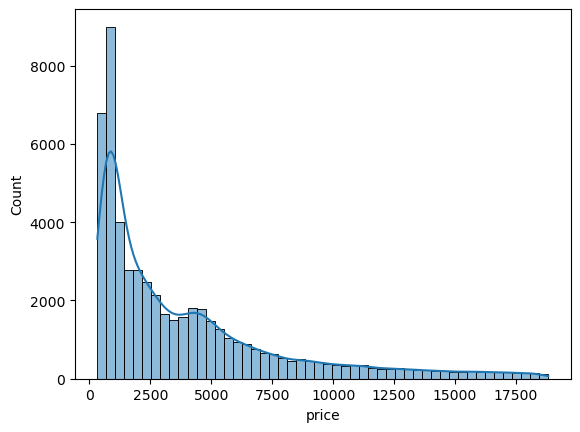

In [88]:
import seaborn as sns

# price

sns.histplot(diamonds['price'], bins=50, kde=True)

# A distribuição de price está altamente concentrada.
# A grande maioria dos diamantes tem preço baixo.
# Vimos anteriormente que seu percentil(75) é R$ 5324

<Axes: xlabel='depth', ylabel='Count'>

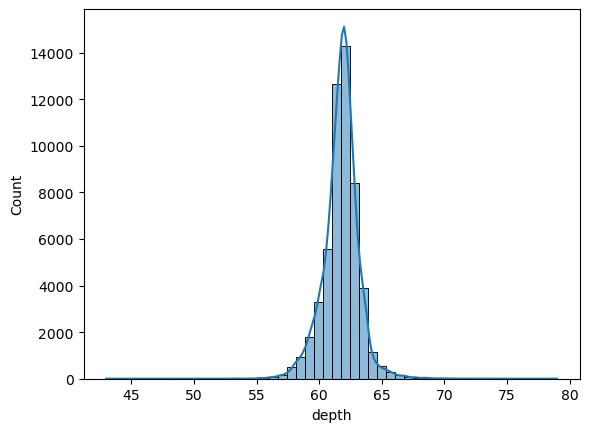

In [89]:
import seaborn as sns

# depth

sns.histplot(diamonds['depth'], bins=50, kde=True)

# Alta concentração dos dados, ao segmentarmos a distribuição em bins

<Axes: xlabel='color', ylabel='price'>

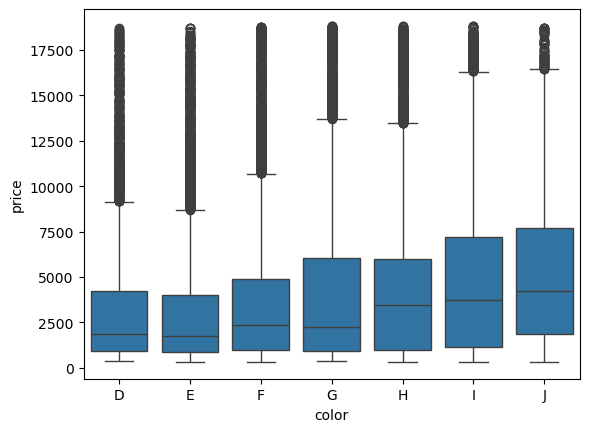

In [90]:
import seaborn as sns

# Dados categóricos:
# diamond colour, from J (worst) to D (best)

sns.boxplot(x='color', y='price', data=diamonds, order=sorted(diamonds['color'].unique()))

# Vemos que a tendência do preço é subir conforme a cor vai ficando melhor

<Axes: xlabel='cut', ylabel='price'>

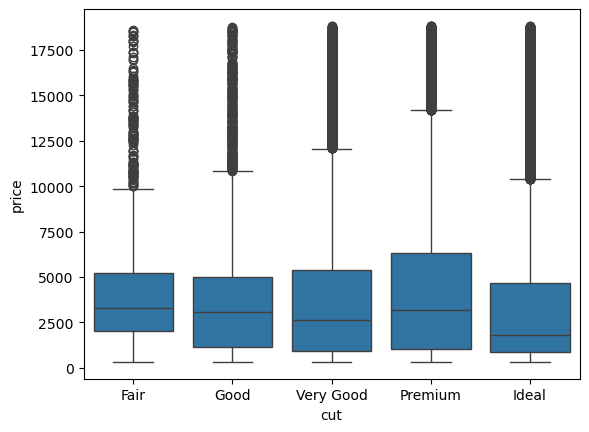

In [91]:
import seaborn as sns

# Dados categóricos:
# CUT

ordinalidade_cut = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']

sns.boxplot(x='cut', y='price', data=diamonds, order=ordinalidade_cut)

# Notamos um crescimento no preço levando em conta seus limites superiores
# com exceção de 'Ideal', onde isso não ocorre.
# Porém, no geral, seus 1os e 3os quartis permanecem bem próximos.

In [92]:
from sklearn.preprocessing import OrdinalEncoder

# Vamos codificar as variáveis categóricas para plotar o gráfico de calor
def encode_variables_diamonds(diamonds):
    ordinalidade_cut = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
    ordinalidade_color = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
    ordinalidade_clarity = ['I1' , 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

    categorical_cols = ['cut', 'color', 'clarity']

    # Cria o encoder com as categorias especificadas
    ordinal_encoder = OrdinalEncoder(categories=[ordinalidade_cut, ordinalidade_color, ordinalidade_clarity])

    # Aplica o fit_transform diretamente nas colunas categóricas
    df_encoded = ordinal_encoder.fit_transform(diamonds[categorical_cols])

    # Adicionar ao dataframe original
    diamonds[categorical_cols] = df_encoded

encode_variables_diamonds(diamonds)
print(diamonds.head())

   carat  cut  color  clarity  depth  table  price     x     y     z
0   0.23  4.0    5.0      1.0   61.5   55.0    326  3.95  3.98  2.43
1   0.21  3.0    5.0      2.0   59.8   61.0    326  3.89  3.84  2.31
2   0.23  1.0    5.0      4.0   56.9   65.0    327  4.05  4.07  2.31
3   0.29  3.0    1.0      3.0   62.4   58.0    334  4.20  4.23  2.63
4   0.31  1.0    0.0      1.0   63.3   58.0    335  4.34  4.35  2.75


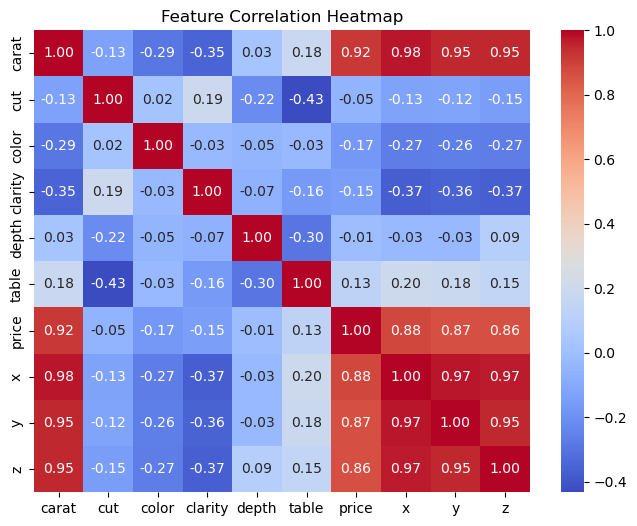

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
# Uma vez as variáveis categóricas codificadas, podemos fazer o
# Mapa de calor de correlação entre as variáveis.

# Dessa forma, podemos entender a relação que as variáveis tem entre si e 
# ver o quanto cada uma está correlacionada com a outra.

# Isso é fundamental na etapa de análise exploratória dos dados e posteriormente
# podermos fazer a feature engineering.


plt.figure(figsize=(8, 6))
sns.heatmap(diamonds.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

*Observações gerais:*

- CARAT tem um alta correlação positiva com PRICE, X, Y e Z.

- X, Y e Z estão correlacionados à PRICE positivamente.

- X, Y e Z estão correlacionados positivamente entre si.

- PRICE e CARAT possuem distribuições assimétricas e é bem desproporcionado.

- Tendência de PRICE subir conforme COLOR vai ficando de melhor qualidade. (ordinal encoding é uma boa prática nesse caso)

,carat,cut,color,clarity,depth,table,price,x,y,z,log_price,log_carat,log_depth
0,0.23,4.0,5.0,1.0,61.5,55.0,326,3.95,3.98,2.43,5.789960,0.207014,4.135167
1,0.21,3.0,5.0,2.0,59.8,61.0,326,3.89,3.84,2.31,5.789960,0.190620,4.107590
2,0.23,1.0,5.0,4.0,56.9,65.0,327,4.05,4.07,2.31,5.793014,0.207014,4.058717
3,0.29,3.0,1.0,3.0,62.4,58.0,334,4.20,4.23,2.63,5.814131,0.254642,4.149464
4,0.31,1.0,0.0,1.0,63.3,58.0,335,4.34,4.35,2.75,5.817111,0.270027,4.163560


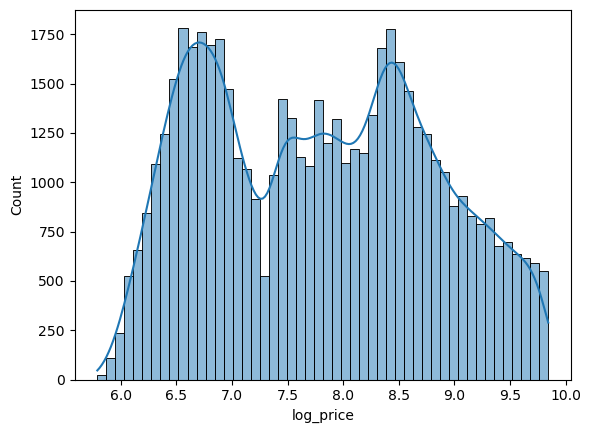

In [94]:
import numpy as np
import seaborn as sns
# Como as variáveis CARAT, DEPTH e PRICE possuem distribuições assimétricas, concentradas em certos intervalos,
# podemos criar novas variáveis com a transformação logarítmica dessas colunas.

# Isso ajuda o modelo a interpretar os dados de forma mais linear, reduzindo a assimetria e facilitando a 
# modelagem.

diamonds['log_price'] = np.log1p(diamonds['price'])
diamonds['log_carat'] = np.log1p(diamonds['carat'])
diamonds['log_depth'] = np.log1p(diamonds['depth'])

# exemplo de distribuição com log aplicado
sns.histplot(diamonds['log_price'], bins=50, kde=True)
diamonds.head()

In [96]:
from sklearn.preprocessing import StandardScaler

# Além disso, podemos colocar outras features que também podem fazer sentido:

# Antes, aplicamos StandardScaler para normalizarmos os dados
def apply_standard_scaler(diamonds):
    scaler = StandardScaler()
    numeric_features = ['price', 'carat', 'depth', 'table', 'x', 'y', 'z']
    df_encoded = scaler.fit_transform(diamonds[numeric_features])
    
    diamonds[numeric_features] = df_encoded

In [97]:
apply_standard_scaler(diamonds)

In [98]:
diamonds[:5]

,carat,cut,color,clarity,depth,table,price,x,y,z,log_price,log_carat,log_depth
0,-1.198168,4.0,5.0,1.0,-0.174092,-1.099672,-0.904095,-1.587837,-1.536196,-1.571129,5.789960,0.207014,4.135167
1,-1.240361,3.0,5.0,2.0,-1.360738,1.585529,-0.904095,-1.641325,-1.658774,-1.741175,5.789960,0.190620,4.107590
2,-1.198168,1.0,5.0,4.0,-3.385019,3.375663,-0.903844,-1.498691,-1.457395,-1.741175,5.793014,0.207014,4.058717
3,-1.071587,3.0,1.0,3.0,0.454133,0.242928,-0.902090,-1.364971,-1.317305,-1.287720,5.814131,0.254642,4.149464
4,-1.029394,1.0,0.0,1.0,1.082358,0.242928,-0.901839,-1.240167,-1.212238,-1.117674,5.817111,0.270027,4.163560


In [99]:
# Novas FEATURES:
# Como as dimensões do diamante X, Y e Z estão fortemente correlacionadas com o preço do diamante,
# podemos acrescentar VOLUME, sendo uma representação mais completa e informativa do volume.
diamonds['volume'] = diamonds['x'] * diamonds['y'] * diamonds['z']

# DEPTH_RATIO é uma forma de capturar a proporcionalidade da forma do diamante.
# Dessa forma, será possível capturar se certos padrões geométricos/formas podem ser mais valorizadas.
# Z / Y --> (depth / width)
diamonds['depth_ratio'] = diamonds['z'] / diamonds['y'] 

In [100]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,log_price,log_carat,log_depth,volume,depth_ratio
0,-1.198168,4.0,5.0,1.0,-0.174092,-1.099672,-0.904095,-1.587837,-1.536196,-1.571129,5.789960,0.207014,4.135167,-3.832344,1.022740
1,-1.240361,3.0,5.0,2.0,-1.360738,1.585529,-0.904095,-1.641325,-1.658774,-1.741175,5.789960,0.190620,4.107590,-4.740502,1.049676
2,-1.198168,1.0,5.0,4.0,-3.385019,3.375663,-0.903844,-1.498691,-1.457395,-1.741175,5.793014,0.207014,4.058717,-3.803048,1.194717
3,-1.071587,3.0,1.0,3.0,0.454133,0.242928,-0.902090,-1.364971,-1.317305,-1.287720,5.814131,0.254642,4.149464,-2.315428,0.977541
4,-1.029394,1.0,0.0,1.0,1.082358,0.242928,-0.901839,-1.240167,-1.212238,-1.117674,5.817111,0.270027,4.163560,-1.680285,0.921992


# (2) Classificação Ordinal Multi-classes

Nesta item, você deve revisitar os seguinte arquivo A652.pickle. No Trabalho 1, você enquadrou
o problema como uma tarefa de classificação binária. Desta vez, você deve enquadrar o
problema como uma tarefa de classificação ordinal multi-classes. Concretamente, desta vez,
você deve discretizar os valores de precipitação (medidos em mm/h) produzindo cinco níveis
(classes), conforme o seguinte mapeamento:

-  0 → NONE
- (0, 5] → WEAK
- (5, 25] → MODERATE
- (25,50] → STRONG
- (50, ∞] → EXTREME


Métodos de aprendizado de máquina para problemas de classificação comumente assumem
que os valores das classes não possuem uma ordem. No entanto, em muitas aplicações práticas,
os valores das classes exibem, sim, uma ordem natural — por exemplo, ao aprender a atribuir
notas ou ao classificar sentimentos (discorda < neutro < concorda), temperaturas (frio < morno
< quente). Nesses casos, o problema deve ser enquadrado como uma tarefa de classificação
ordinal. Sendo assim, nesse item você deve implementar a abordagem descrita no [artigo](<https://link.springer.com/chapter/10.1007/3-540-44795-4_13>) Simple Approach to Ordinal Classification para criar um classificador multi-classes ordinal. Um bom
ponto de partida para esta tarefa é esta página no portal - [GitHub](<https://github.com/leeprevost/OrdinalClassifier/tree/main>).
Crie os modelos de classificação utilizando o algoritmo GradientBoostingClassifier.
Apresente seus resultados (medidos sobre os respectivos conjuntos de teste) na forma de
matrizes de confusão e utilizando a função classification_report do Scikit-Learn. Apresente
também uma análise comparativa com o modelo gerado (também usando o algoritmo
GradientBoostingClassifier) sem considerar que há ordem entre as classes.

In [103]:
import pickle
import numpy as np

path = 'C:/Users/parai/Documents/Github - Aprendizado de Máquina/Machine-Learning/data/'
filename = 'A652.pickle'
f = open(f"{path}/{filename}", "rb")

(X_train, y_train, X_val, y_val, X_test, y_test) = pickle.load(f)

# Não usaremos o conjunto de validation nessa questão
X_train = np.concatenate([X_train, X_val])
y_train = np.concatenate([y_train, y_val])



In [104]:
import numpy as np

def discretize(y):
    ystr = []
    for i, y_ in enumerate(y):
        if y_ == 0:
            ystr.append('NONE')
        if 5 >= y_ > 0:
            ystr.append('WEAK')
        if 25 >= y_ > 5:
            ystr.append('MODERATE')
        if 50 >= y_ > 25:
            ystr.append('STRONG')
        if y_ > 50:
            ystr.append('EXTREME')
    return np.array(ystr).reshape(-1, 1)

y_train_discretized = discretize(y_train)
y_test_discretized = discretize(y_test)

y_train_discretized.shape

# Transformar as variáveis entre as categorias 'NONE', 'WEAK', 'MODERATE', 'STRONG' e 'EXTREME'

(12518, 1)

In [105]:
from sklearn.preprocessing import OrdinalEncoder


ordinalidade_rain = [['NONE', 'WEAK', 'MODERATE', 'STRONG', 'EXTREME']]

le = OrdinalEncoder(categories=ordinalidade_rain) # Fit on the known order
y_train_ord = le.fit_transform(y_train_discretized)  
y_test_ord = le.transform(y_test_discretized)

# remover 1 dimensão extra que ficou (n_samples, 1) para (n_samples,)
y_train_ = np.ravel(y_train_ord)
y_test_= np.ravel(y_test_ord)


Probabilidades com Ordinal Classification:

    - Pr(V1) = 1 − Pr(Target > V1)

    - Pr(Vi) = Pr(Target > Vi−1) * (1 − Pr(Target > Vi)) ; 1 < i < k

    - Pr(Vk) = Pr(Target > Vk−1)

Obs: Esse método aprimora a menor classe, dentro das classes ordenadas (eg. "cold" in cold<warm<hot). Logo, se a classe positiva for "hot", considere reverter a ordem das classes para aprimorar os escores em "hot".

In [106]:
def make_binary_targets(y, t):
    """
    Converter y para um alvo binário (y > t)
    """
    return (y > t).astype(int)

In [107]:
classes_nominais = ['NONE', 'WEAK', 'MODERATE', 'STRONG', 'EXTREME']

classes = np.sort(np.unique(y_train_))
k = len(classes)

print(f"Quantidade de classes: {k}\n\n")


# Para ordinal classification, existe uma etapa de pré-processamento onde dividimos o dataset em k-1 outros.
# Substituímos o dataset de várias classes para k-1 outros de classificação binária.

# O primeiro se define pela classificação entre NONE (0) e WEAK (1);
# O último se define: STRONG (0) e EXTREME (1).

# Teremos 4 novas classes: (>NONE, >WEAK, >MODERATE, >STRONG)

y_binaries = []
for t in range(k):
    y_binary = make_binary_targets(y_train_, t)
    y_binaries.append(y_binary)
    print(f"Class: >{classes_nominais[t]}")
    print(f"Shape: {y_binary.shape}")
    print(f"Dtype: {y_binary.dtype}")
    print(f"Unique values: {np.unique(y_binary)}")
    print(f"Sum da classe positiva (1): {np.sum(y_binary[y_binary==1])}\n")

Quantidade de classes: 4


Class: >NONE
Shape: (12518,)
Dtype: int32
Unique values: [0 1]
Sum da classe positiva (1): 983

Class: >WEAK
Shape: (12518,)
Dtype: int32
Unique values: [0 1]
Sum da classe positiva (1): 97

Class: >MODERATE
Shape: (12518,)
Dtype: int32
Unique values: [0 1]
Sum da classe positiva (1): 3

Class: >STRONG
Shape: (12518,)
Dtype: int32
Unique values: [0]
Sum da classe positiva (1): 0



In [108]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.base import clone

# Agora que temos os datasets binários, vamos fazer o fit dos modelos para cada uma das novas classes
models = []
base_model = GradientBoostingClassifier()


for t in range(k): 

    print(f"\nclasse: {classes[t]} / >{classes_nominais[t]}")
    
    if(len(np.unique(y_binaries[t])) == 2): # A classe >STRONG não será treinada, pois só tem labels negativos
        
        model = clone(base_model) # criamos um classificador pra cada dataset
        
        print(f"Fit do classificador (>{classes_nominais[t]})")
        model.fit(X_train,y_binaries[t]) 
        models.append(model)



classe: 0.0 / >NONE
Fit do classificador (>NONE)

classe: 1.0 / >WEAK
Fit do classificador (>WEAK)

classe: 2.0 / >MODERATE
Fit do classificador (>MODERATE)

classe: 3.0 / >STRONG


In [109]:
len(models)

3

In [110]:
X_test.shape

(9582, 24)

In [111]:
# Inicializa com -1, para saber quem não foi classificado
unified_Y = np.full(X_test.shape[0], -1)  

# Passo 1: classificador >NONE
Y = np.array(models[0].predict(X_test))  # predições binárias

# Quem for == 0, é classe NONE
unified_Y[Y == 0] = 0  

# Abaixo, filtramos o X_teste para os próximos classificadores (samples predizidas >NONE)
X_test_maior_que_NONE = X_test[Y == 1]
idx_maior_que_NONE = np.where(Y == 1)[0]  # salva os índices relativos ao Y que o classificador resultou na classe positiva (1)

print(f"Temos {len(unified_Y[unified_Y == 0])} da classe WEAK")


Temos 9212 da classe WEAK


In [112]:
# Passo 2: classificador >WEAK
Y_2 = np.array(models[1].predict(X_test_maior_que_NONE))

# Quem for == 0, é WEAK
unified_Y[idx_maior_que_NONE[Y_2 == 0]] = 1  
# Para os que o segundo classificador resultou na classe negativa, 
# colocamos a classe WEAK (1) em unified_Y (dentro dos índices que o classificador antigo definiu como (1))

print(f"Temos {len(unified_Y[unified_Y == 1])} da classe WEAK")


# Filtra quem é > WEAK
X_test_maior_que_WEAK = X_test_maior_que_NONE[Y_2 == 1]
idx_maior_que_WEAK = idx_maior_que_NONE[Y_2 == 1]  # salva os índices que o classificador resultou na classe positiva (1) '>WEAK'



Temos 356 da classe WEAK


In [113]:
# Passo 3: >MODERATE
Y_3 = np.array(models[2].predict(X_test_maior_que_WEAK))

# Quem for == 0, é MODERATE
unified_Y[idx_maior_que_WEAK[Y_3 == 0]] = 2  

# Quem for == 1, é STRONG
unified_Y[idx_maior_que_WEAK[Y_3 == 1]] = 3  

print(f"Temos {len(unified_Y[unified_Y == 2])} da classe MODERATE")

print(f"Temos {len(unified_Y[unified_Y == 3])} da classe STRONG")

Temos 14 da classe MODERATE
Temos 0 da classe STRONG


c:\Users\parai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\parai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\parai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97      8769
         1.0       0.73      0.34      0.47       757
         2.0       0.14      0.04      0.06        50
         3.0       0.00      0.00      0.00         4
         4.0       0.00      0.00      0.00         2

    accuracy                           0.94      9582
   macro avg       0.36      0.28      0.30      9582
weighted avg       0.92      0.94      0.92      9582



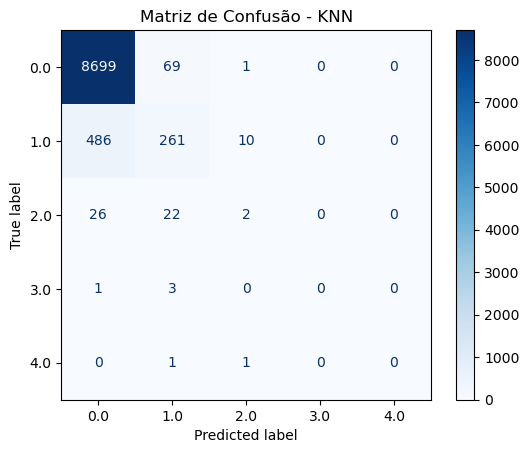

In [114]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
import matplotlib.pyplot as plt


cm = confusion_matrix(y_test_, unified_Y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test_))
disp.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusão - KNN')

print(classification_report(y_test_, unified_Y))


In [115]:
normal_cls = GradientBoostingClassifier()

normal_cls.fit(X_train,y_train_)

pred_ctrl = normal_cls.predict(X_test)

c:\Users\parai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\parai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\parai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97      8769
         1.0       0.72      0.32      0.44       757
         2.0       0.12      0.04      0.06        50
         3.0       0.50      0.25      0.33         4
         4.0       0.00      0.00      0.00         2

    accuracy                           0.93      9582
   macro avg       0.46      0.32      0.36      9582
weighted avg       0.92      0.93      0.92      9582



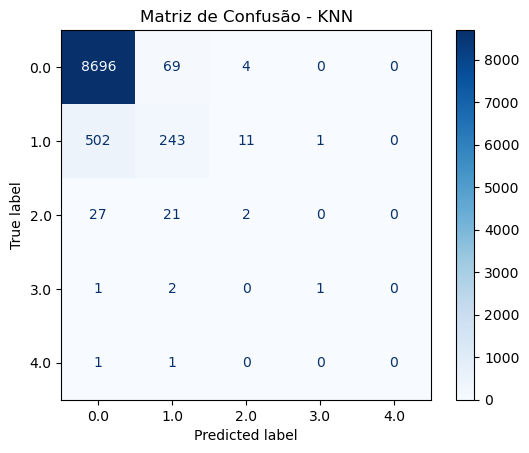

In [116]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
import matplotlib.pyplot as plt


cm = confusion_matrix(y_test_, pred_ctrl)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test_))
disp.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusão - KNN')

print(classification_report(y_test_, pred_ctrl))


# (3) SHAP Values

Considere novamente o problema de classificação multi-classes apresentado no item 2 deste
trabalho. Considere também novos arquivos fornecidos cujos padrões de nomenclatura são:
    - A652_train.parquet.gzip
    - A652_val.parquet.gzip
    - A652_test.parquet.gzip

Nesses arquivos, 652 representa o identificador da estação meteorológica na qual foram
observados os dados. Os nomes das colunas nesses arquivos permitem que você entenda o
significado de cada coluna.

Inicialmente, junto os exemplos de treino e validação em um único conjunto, para ter mais
exemplos para treinar o modelo. Chame esse conjunto de D. Em seguida, crie um modelo de
classificação binária usando o algoritmo GradientBoostingClassifier sobre D. Em seguida,
apresente uma análise de explicabilidade do comportamento desse modelo sobre os exemplos
do conjunto de testes correspondente. Você deve usar a biblioteca SHAP1 para dar suporte à
sua análise. Apenas como sugestão (você deve refletir sobre as perguntas que entende fazerem
sentido), seguem algumas perguntas para guiar a sua análise.

1. Qual a importância de cada feature para uma predição específica?
2. Como uma feature específica impacta a predição em geral?
3. Como cada feature contribui para o desempenho do modelo?
4. Quais instâncias da classe EXTREME são as mais influenciadas por uma determinada
feature?    
5. Quais features têm contribuições consistentes ou inconsistentes em instância da classe
EXTREME?
6. Como as predições mudam com variações nas features?
7. Quais features estão mais correlacionadas com outras em termos de contribuição para as
predições?

# (4) Redução de dimensionalidade

Considere novamente o problema de classificação ordinal multi-classes apresentado no item 2
deste trabalho. Neste item, você irá realizar um experimento usando o algoritmo PCA. Inicialmente,
usando a técnica three-way holdout, escolha o melhor valor para a quantidade de
componentes principais, k. Chame o conjunto de dados original de D1, e de D2 o conjunto
resultante da aplicação do PCA (com o melhor k) sobre D1. Ajuste dois modelos de classificação
multi-classe, um sobre D1, e o outro sobre D2. Em ambos os casos, use o algoritmo
GradientBoostingClassifier. Apresente uma análise comparativa entre esse dois modelos.

In [117]:
import pickle

path = 'C:/Users/parai/Documents/Github - Aprendizado de Máquina/Machine-Learning/data/'
filename = 'A652.pickle'
f = open(f"{path}/{filename}", "rb")

(X_train, y_train, X_val, y_val, X_test, y_test) = pickle.load(f)


In [118]:
def discretize(y):
    ystr = []
    for i, y_ in enumerate(y):
        if y_ == 0:
            ystr.append('NONE')
        if 5 >= y_ > 0:
            ystr.append('WEAK')
        if 25 >= y_ > 5:
            ystr.append('MODERATE')
        if 50 >= y_ > 25:
            ystr.append('STRONG')
        if y_ > 50:
            ystr.append('EXTREME')
    return ystr

y_train_discretized = discretize(y_train)
y_val_discretized = discretize(y_val)
y_test_discretized = discretize(y_test)

In [119]:
X_val.shape

# Existem 24 features !

(2506, 24)

O **PCA** (Análise dos Componentes Principais) reduz a dimensionalidade dos dados enquanto preserva o máximo de variabilidade possível.

Encontra novos aixos (chamados de principais componentes) que melhor representam os dados (que mais retêm a informação da variabilidade dos dados). Esses eixos também podem ser vistos como combinações lineares das variáveis originais.

Ao aplicar o PCA, rotacionamos o sistema de eixos para alinhar com essas novas direções de máxima variabilidade. Depois, podemos descartar os componentes menos importantes (com menos variância) para reduzir a dimensionalidade.

In [ ]:
import numpy as np
from scipy import linalg as LA

def svd(Sigma):
    
    # SVD é um método que decompõe uma matriz A.
    
    # U é a matriz dos eigenvectors (matriz das direções principais)
    # S é a matriz de valores singulares relacionada à raiz quadrada dos autovalores 
    
    U, S, V = LA.svd(Sigma)
    return U, S, V

def pca(X, k):
    """
    Performs Principal Component Analysis (PCA) on the input data matrix X and projects it onto the top-k principal components.

    Notes:
    ------
    This implementation computes the covariance matrix of X, performs Singular Value Decomposition (SVD) to obtain
    principal components, and projects the original data onto the subspace spanned by the top-k components.
    """
    Sigma = np.cov(X, rowvar=False)
    
    U, S, V = svd(Sigma)
    
    W = U[:, :k]
    
    X_projected = np.matmul(X, W)
    
    # cálculo da proporção da variancia explicada
    explained_variance = S**2
    total_variance = np.sum(explained_variance)
    explained_variance_ratio = explained_variance / total_variance
    
    return X_projected, W, explained_variance_ratio


In [121]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Podemos plotar o scree plot para ver quantas componentes principais possuem baixa variabilidade nos dados

print(f"Original Data Matrix: {X_val[0]}")

# Standardized data matrix
scaler = StandardScaler()
standardized_X_val = scaler.fit_transform(X_val)
standardized_X_train = scaler.transform(X_train)
standardized_X_test = scaler.transform(X_test)

print(f"\nStandardized Data Matrix: {standardized_X_val[0]}")


Original Data Matrix: [0.31336406 0.69135802 0.78571429 0.43604944 0.34234762 0.9330127
 0.75       0.         0.30414747 0.67901235 0.76785714 0.46681666
 0.28462957 0.98296291 0.62940952 0.         0.29953917 0.64609053
 0.75       0.43996532 0.26886881 1.         0.5        0.        ]

Standardized Data Matrix: [-0.02737928  0.83656228  0.01639933  0.06350851 -0.34350587  1.2256057
  0.71196015 -0.15340589 -0.10854085  0.7620771  -0.09266042  0.3087876
 -0.97806072  1.36760464  0.37035148 -0.15386365 -0.14912165  0.56166329
 -0.20199367  0.09473688 -1.15249657  1.41659752  0.00331155 -0.15386365]


In [122]:
# Aplicamos a função já implementada do PCA, passando:
# X normalizado (média = 0)
# k = 20 componentes (redução de 4 features)

# A função retorna X_projected, que é o conjunto X_train projetado nas top-K principais componentes.

X_projected, components, explained_variance = pca(standardized_X_val, 20)

print(X_projected.shape) # Shape agora terá o tamanho com o número reduzido de features

(2506, 20)


0.9999999999999999


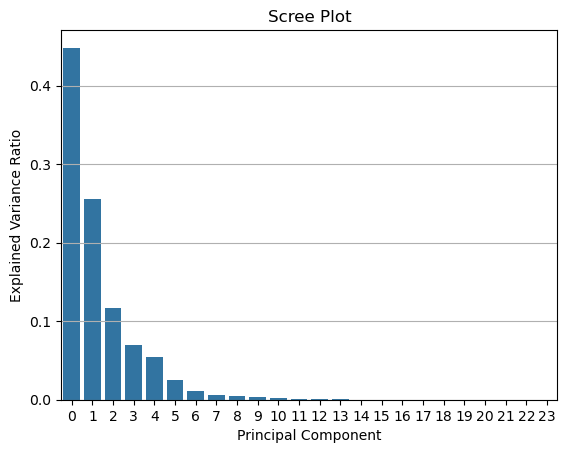

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scree Plot mostra a variância explicada por cada componente principal.
# Podemos encarar como a porcentagem (%) da explicabilidade da variância.
# Ou seja, a soma de todas as porcentagens das componentes dará 1.
print(np.sum(explained_variance))

sns.barplot(x=np.arange(len(explained_variance)), y=explained_variance)
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot")
plt.grid(True, axis='y')
plt.show()

# Naturalmente, a primeira componente principal é a que mais representa a variabilidade dos dados
# Vemos que, para as outras componentes principais não têm grande explicabilidade da variância
# A partir da componente 10, a proporção vai ficando muito próxima de 0.

# LOGO, podemos reduzir mais ainda sem ter perda significativa da variância dos dados originais.

In [125]:
from sklearn.decomposition import PCA

# Podemos usar essa função já implementada do sklearn para reduzir a dimensionalidade:

# Além disso, ao invés de especificar a quantidade de principais componentes a serem preservadas,
# é possível definir esse parâmetro como um valor entre 0 a 1, indicando a "explained_variance" acumulada a ser mantida.

pca_val = PCA(n_components = 0.95)
projected_x_val = pca_val.fit_transform(standardized_X_val)

print(projected_x_val.shape)
# Para reter 95% da variabilidade dos dados, foi possível reduzir à 11 variáveis do dataset original (como vimos no scree plot).


# Aplicamos somente o .fit_transform() no conjunto de treinamento e o fit() no de teste:
pca = PCA(n_components = 11)
D2 = pca.fit_transform(standardized_X_train)
D2_test = pca.transform(standardized_X_test)

(2506, 11)


In [126]:
D2.shape

(10012, 11)

### Análise comparativa entre dois modelos: D1 e D2.

In [127]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_D1 = GradientBoostingClassifier()
gbc_D1.fit(X_train, y_train_discretized)
y_pred_D1 = gbc_D1.predict(X_test)

gbc_D2 = GradientBoostingClassifier()
gbc_D2.fit(D2, y_train_discretized)
y_pred_D2 = gbc_D2.predict(D2_test)


In [128]:
from sklearn.metrics import classification_report


# SEM DIMENSIONALITY REDUCTION
print(classification_report(y_test_discretized, y_pred_D1))

c:\Users\parai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\parai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

     EXTREME       0.00      0.00      0.00         2
    MODERATE       0.10      0.04      0.06        50
        NONE       0.94      0.99      0.96      8769
      STRONG       0.00      0.00      0.00         4
        WEAK       0.67      0.30      0.41       757

    accuracy                           0.93      9582
   macro avg       0.34      0.27      0.29      9582
weighted avg       0.91      0.93      0.92      9582



c:\Users\parai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [129]:
from sklearn.metrics import classification_report


# COM DIMENSIONALITY REDUCTION
print(classification_report(y_test_discretized, y_pred_D2))

              precision    recall  f1-score   support

     EXTREME       0.00      0.00      0.00         2
    MODERATE       0.06      0.02      0.03        50
        NONE       0.94      0.99      0.96      8769
      STRONG       0.00      0.00      0.00         4
        WEAK       0.68      0.25      0.36       757

    accuracy                           0.93      9582
   macro avg       0.33      0.25      0.27      9582
weighted avg       0.91      0.93      0.91      9582



c:\Users\parai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\parai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\parai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Análise Comparativa:**

Percebemos que existe a classe majoritária 'NONE' que domina o conjunto de dados e as outras que possuem poucos exemplos que o modelo nem conseguiu aprender (e.g.: 'EXTREME', 'STRONG').

Para tanto, a segunda maior classe, 'WEAK', possui uma precisão significativa e o recall baixo (modelo não detecta bem a classe 1 (Chuva), tendo muitos falsos negativos).

No entanto, analisando os dois modelos, percebe-se que não há uma grande diferença de performance, o que é interessante, levando em consideração a grande redução de dimensionalidade que foi realizada.


---

# (5) Predição Conforme

Considere novamente o conjunto de dados diamonds. Neste item, você
deve usar a técnica de predição conforme (conformal prediction) para produzir intervalos de
predição para os exemplos que separar para seu conjunto de testes. Apresente uma análise
para os exemplos do conjunto de testes que apresentarem o maior e o menor intervalos.

In [134]:
import pandas as pd

url = 'https://raw.githubusercontent.com/AILAB-CEFET-RJ/cic1205/refs/heads/main/data/diamonds.csv'

diamonds = pd.read_csv(url)


In [135]:
# Etapa de pré-processamento dos dados

# Funções já implementadas no bloco da 1a questão:
encode_variables_diamonds(diamonds)
apply_standard_scaler(diamonds)

diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,-1.198168,4.0,5.0,1.0,-0.174092,-1.099672,-0.904095,-1.587837,-1.536196,-1.571129
1,-1.240361,3.0,5.0,2.0,-1.360738,1.585529,-0.904095,-1.641325,-1.658774,-1.741175
2,-1.198168,1.0,5.0,4.0,-3.385019,3.375663,-0.903844,-1.498691,-1.457395,-1.741175
3,-1.071587,3.0,1.0,3.0,0.454133,0.242928,-0.902090,-1.364971,-1.317305,-1.287720
4,-1.029394,1.0,0.0,1.0,1.082358,0.242928,-0.901839,-1.240167,-1.212238,-1.117674


In [136]:
from sklearn.model_selection import train_test_split

y_diamonds = diamonds['price']
X_diamonds = diamonds.drop(columns=['price'])

X_train, X_temp, y_train, y_temp = train_test_split(X_diamonds, y_diamonds, train_size=0.8, random_state=42)

X_calib, X_test, y_calib, y_test = train_test_split(X_temp, y_temp, train_size=0.5, random_state=42)


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor


# Treinando GBR sob diferentes quantis: [5%, 95% e 50%]
# na ordem certa (lower, higher e median)
alphas = [0.05, 0.95, 0.5]
models = []
for a in alphas:
    m = GradientBoostingRegressor(loss='quantile',alpha=a)
    m.fit(X_train, y_train)
    models.append(m)

In [137]:
from sklearn.ensemble import GradientBoostingRegressor


# Esperamos que não mais do que 10% das observações irão cair fora do intervalo de predição pelo MAPIE
regressor = GradientBoostingRegressor(loss='quantile',alpha=0.1)

In [138]:
from mapie.regression import MapieQuantileRegressor

# Model Agnostic Prediction Interval Estimator

# Tratamento automático de monotonicidade
alpha = 0.1
mapie = MapieQuantileRegressor(estimator=regressor, alpha=alpha, cv="split")

In [139]:
# Train: data on which the predictive model learns
# Calib: data on which MAPIE calibrates the intervals.

mapie.fit(
            X_train, y_train,
            X_calib=X_calib, y_calib=y_calib,
            random_state=42
        )

MapieQuantileRegressor(cv='split',
                       estimator=GradientBoostingRegressor(alpha=0.1,
                                                           loss='quantile'))

In [143]:
from mapie.metrics import regression_coverage_score
from mapie.metrics import regression_mean_width_score

# y_pred: predição da mediana
# y_qr: predição intervalar
y_pred, y_qr = mapie.predict(X_test)

coverage = regression_coverage_score(y_test, y_qr[:, 0, 0], y_qr[:, 1, 0])

width = regression_mean_width_score(y_qr[:, 0, 0], y_qr[:, 1, 0])

print("Average interval width: {:.2f}".format(width))

print("Coverage: {:.2%}".format(coverage)) # como alpha = 0.1, coverage será próximo de 90%

INFO:root:The predictions are ill-sorted.
INFO:root:The predictions are ill-sorted.


Average interval width: 0.53
Coverage: 90.32%


In [144]:
import pandas as pd
predictions = pd.DataFrame(y_test)
predictions.columns = ['y_true']
predictions["point prediction"] = y_pred
predictions["lower"] = y_qr.reshape(-1,2)[:,0]
predictions["upper"] = y_qr.reshape(-1,2)[:,1]
# take a quick look
predictions

,y_true,point prediction,lower,upper
52383,-0.357397,-0.371867,-0.548514,-0.175873
44166,-0.593522,-0.630895,-0.645751,-0.556984
33620,-0.869754,-0.858872,-0.871464,-0.771070
16227,0.640497,0.728429,0.193658,1.023229
37037,-0.743419,-0.751369,-0.779456,-0.615430
...,...,...,...,...
13822,0.425928,0.713495,0.270030,1.214984
24296,2.158769,1.845325,0.592512,2.303648
13449,0.398355,0.231436,0.128357,0.737480
23330,1.865743,1.594611,0.373939,2.381572


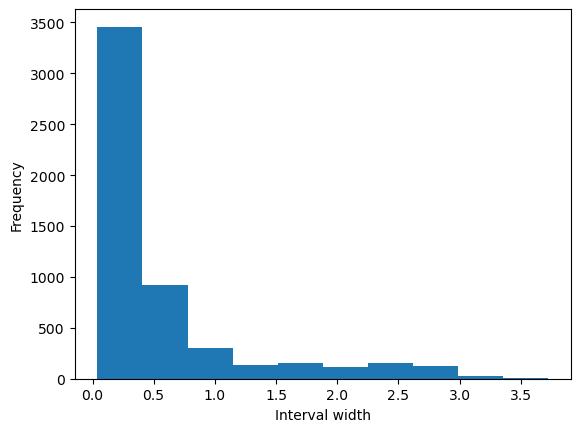

In [146]:
import matplotlib.pyplot as plt

widths = y_qr[:,1] - y_qr[:,0]
plt.hist(widths)
# Label the x-axis
plt.xlabel("Interval width")
# Label the y-axis
plt.ylabel("Frequency")
plt.show()

In [147]:
max_idx = np.argmax(widths)
min_idx = np.argmin(widths)

print("Max difference:", widths[max_idx], "at index:", y_test.index[max_idx])
print(f"Prediction interval: [{predictions['lower'].iloc[max_idx]:.2f},{predictions['upper'].iloc[max_idx]:.2f}]")
print(f"true y: {y_test.iloc[max_idx]}\n")

# Sem intervalos negativos (quantil 0.9 menor que o quantil 0.1), como acontece no QuantileRegressor
print("Min difference:", widths[min_idx], "at index:", y_test.index[min_idx])
print(f"Prediction interval: [{predictions['lower'].iloc[min_idx]:.2f},{predictions['upper'].iloc[min_idx]:.2f}]")
print(f"true y: {y_test.iloc[min_idx]}\n")

print()


Max difference: [3.72484391] at index: 27290
Prediction interval: [0.40,4.13]
true y: 3.4659825337627845

Min difference: [0.03932413] at index: 34740
Prediction interval: [-0.81,-0.77]
true y: -0.7662299114993506


